### Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

# Exercícios

---
$1.$ Dadas as definições $\sinh x:=(e^{x}-e^{-x})/2$ e $\cosh x:=(e^{x}+e^{-x})/2$, verifique que $\cosh^{2}x-\sinh^{2}x=1$.

_SOL._ Temos 
\begin{align}
& \cosh^{2}x-\sinh^{2}x = (e^{x}+e^{-x})(e^{x}+e^{-x})/4 - (e^{x}-e^{-x})(e^{x}-e^{-x})/4 \\
& = (e^{2x}+e^{-2x}+2)/4 - (e^{2x}+e^{-2x}-2)/4 = 1.
\end{align}

---
$2.$ Uma camada de óxido, em um dispositivo semicondutor, forma uma barreira de $0,6\text{ nm}$ de largura e $9\text{ eV}$ de altura. Para elétrons acelerados com uma ddp de $4\text{ V}$, qual é a fração deles que consegue atravessar a barreira? Qual deveria ser a ddp de aceleração para que o valor de $T$ seja o dobro desse valor?

_SOL._ Aqui $E<U_{0}$ e o coeficiente de transmissão é $T = \left(\frac{\sinh^{2}\left(ak_{e}\sqrt{\frac{U_{0}}{E}-1}\right)}{4\frac{E}{U_{0}}\left(1-\frac{E}{U_{0}}\right)}+1\right)^{-1}$. Assim, para esses parâmetros, $T\approx 4,23\mathrm{x}10^{-6}$. Para resolver a segunda parte da questão, precisamos resolver uma equação transcendental. Fazendo isso obtemos que para dobrar $T$ devemos aplicar ao elétron uma ddp $V=4,48\text{ V}$.

In [5]:
e = 1.60217662*10**-19 # C (carga elementar)
me = 9.109382*10**-31 # kg (massa do elétron)
import math
h = 6.626069*10**-34 # Js (constante de Planck)
hb = h/(2*math.pi) # hbar

def T(E,U0,a,m): #2
    ke = math.sqrt(2*m*E)/hb; kb = ke*math.sqrt(U0/E-1)
    print('ke = ',ke,', lambda = ',2*math.pi/ke)
    print('kb = ',kb,', kb*a =',kb*a)
    ts = (math.exp(kb*a)-math.exp(-kb*a))/2; print('ts = ', ts)
    return (1+ts**2/(4*(E/U0)*(1-E/U0)))**-1
T(4*e,9*e,0.6*10**-9,me)

ke =  10246335215.971977 , lambda =  6.132129366005285e-10
kb =  11455751031.581665 , kb*a = 6.873450618948999
ts =  483.1380194419781


4.231172206495169e-06

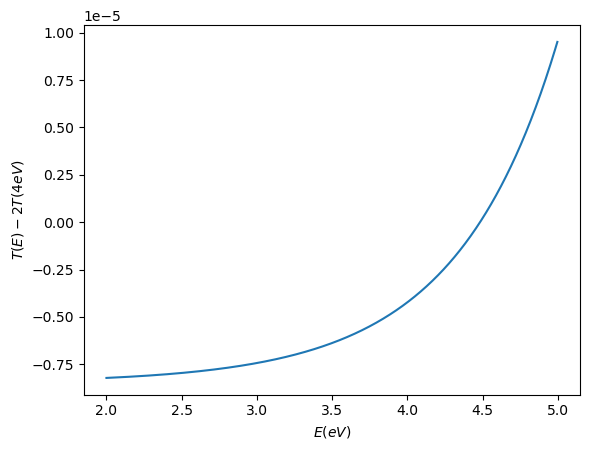

In [7]:
import numpy as np
from matplotlib import pyplot as plt
m = me; U0 = 9; a = 0.6*10**-9
N = 1000; xmin = 2; xmax = 5; dx = (xmax-xmin)/N; x = np.zeros(N); y = np.zeros(N)
for j in range(0,N):
    x[j] = xmin + j*dx
    ke = math.sqrt(2*m*x[j]*e)/hb; kb = ke*math.sqrt(U0/x[j]-1); ts = (math.exp(kb*a)-math.exp(-kb*a))/2
    y[j] = (1+ts**2/(4*(x[j]/U0)*(1-x[j]/U0)))**-1 - 2*4.231171982709953*10**-6
plt.plot(x,y); plt.xlabel(r'$E(eV)$'); plt.ylabel(r'$T(E)-2T(4eV)$'); plt.show()

In [9]:
from sympy import sqrt

def fb(E):
    U0 = 9; a = 0.6*10**-9; ke = sqrt(2*m*E*e)/hb; kb = sqrt((U0/E)-1)*ke
    ts = (math.exp(kb*a)-math.exp(-kb*a))/2
    return (1+ts**2/(4*(E/U0)*(1-E/U0)))**-1 - 2*4.231171982709953*10**-6
%run numerics.ipynb
xr,er = bissection(fb, 4, 5, 10**-6, 10**3); print(xr)

4.482935428619385


---
$3.$ Faça todos os cálculos necessários para obter o coeficiente de trasmissão para $E>U_{0}$, sob as mesmas condições iniciais usadas acima. Faça um gráfico de $T$ e $R$ versus $E/U_{0}$.

_SOL._ Para $k_{e}=\sqrt{2mE}/\hbar$ e $k_{b}=\sqrt{2m(E-U_{0})}/\hbar$, as soluções da EqSIT1D nas 3 regiões são
\begin{align}
& \Xi_{e} = c_{ed}e^{ik_{e}x}+c_{ee}e^{-ik_{e}x}, \\
& \Xi_{b} = c_{bd}e^{ik_{b}x}+c_{be}e^{-ik_{b}x}, \\
& \Xi_{d} = c_{dd}e^{ik_{e}x}+c_{de}e^{-ik_{e}x}.
\end{align}
Pela condição inicial, temos $c_{de}=0$. Pela continuidade da função de onda e da sua derivada 1ª teremos
\begin{align}
& \Xi_{e}(0) = \Xi_{b}(0) \therefore c_{ed}+c_{ee}=c_{bd}+c_{be}, \\
& \Xi_{b}(a) = \Xi_{d}(a) \therefore c_{bd}e^{ik_{b}a}+c_{be}e^{-ik_{b}a}=c_{dd}e^{ik_{e}a}, \\
& \partial_{x}\Xi_{e}(0) = \partial_{x}\Xi_{b}(0) \therefore ik_{e}(c_{ed}-c_{ee})=ik_{b}(c_{bd}-c_{be}), \\
& \partial_{x}\Xi_{b}(a) = \partial_{x}\Xi_{d}(a) \therefore ik_{b}(c_{bd}e^{ik_{b}a}-c_{be}e^{-ik_{b}a})=ik_{e}c_{dd}e^{ik_{e}a}.
\end{align}
Esse sistema de eqs. pode ser escrito como 
$$\begin{bmatrix}1&-1&-1&0 \\ 0&e^{ik_{b}a}&e^{-ik_{b}a}&-e^{ik_{e}a}\\ -k_{e}&-k_{b}&k_{b}&0 \\ 0&k_{b}e^{ik_{b}a}&-k_{b}e^{-ik_{b}a}&-k_{e}e^{ik_{e}a} \end{bmatrix}\begin{bmatrix}c_{ee}\\c_{bd}\\c_{be}\\c_{dd}\end{bmatrix}=\begin{bmatrix}-1\\0\\-k_{e}\\ 0 \end{bmatrix}.$$

In [13]:
from sympy import symbols, Matrix, exp, simplify
a,kb,ke = symbols('a k_{b} k_{e}')
A = Matrix([[1,-1,-1,0],[0,exp(1j*kb*a),exp(-1j*kb*a),-exp(1j*ke*a)],
            [-ke,-kb,kb,0],[0,kb*exp(1j*kb*a),-kb*exp(-1j*kb*a),-ke*exp(1j*ke*a)]])
A # matrix de coeficientes

Matrix([
[     1,                       -1,                         -1,                         0],
[     0,       exp(1.0*I*a*k_{b}),        exp(-1.0*I*a*k_{b}),       -exp(1.0*I*a*k_{e})],
[-k_{e},                   -k_{b},                      k_{b},                         0],
[     0, k_{b}*exp(1.0*I*a*k_{b}), -k_{b}*exp(-1.0*I*a*k_{b}), -k_{e}*exp(1.0*I*a*k_{e})]])

In [15]:
ced = symbols('c_{ed}') # cdd = |x>_4 = A^-1[4,1]|y>_1 + A^-1[4,3]|y>_3 
Ainv = A.inv(); 
cdd = Ainv[3,0]*(-ced) + Ainv[3,2]*(-ke*ced); simplify(cdd) # inversa

4*c_{ed}*k_{b}*k_{e}*exp(1.0*I*a*(k_{b} - k_{e}))/(-k_{b}**2*exp(2.0*I*a*k_{b}) + k_{b}**2 + 2*k_{b}*k_{e}*exp(2.0*I*a*k_{b}) + 2*k_{b}*k_{e} - k_{e}**2*exp(2.0*I*a*k_{b}) + k_{e}**2)

Para $A|x\rangle=|y\rangle,$ temos que $|x\rangle=A^{-1}|y\rangle.$ Simplificando essa expressão, obtemos o coeficiente de transmissão:
\begin{equation}
T = \frac{|c_{dd}|^{2}}{|c_{ed}|^{2}} = \left(1+\frac{(k_{b}^{2}-k_{e}^{2})^{2}}{4k_{b}^{2}k_{e}^{2}}\sin^{2}(k_{b}a)\right)^{-1}.
\end{equation}
O gráficos de $T$ e $R$ estão mostrados na figura abaixo, tanto para $E<U_{0}$ quanto para $E>U_{0}.$

In [29]:
from ipywidgets import interactive

def EltU0(a):
    fig = plt.figure(figsize=(8,5)); U0 = 1; m = 1; hbb = 1
    x = np.arange(0.01,0.999,0.005); ke = np.sqrt(2*m*x)/hbb; kb = np.sqrt((U0/x)-1)*ke
    T = 1/(1+((np.sinh(kb*a)**2)*((kb**2+ke**2)**2/(4*kb**2*ke**2)))); R = 1-T
    plt.plot(x,R,color='blue'); plt.plot(x,T,color='red')
    x = np.arange(1.001,12,0.005); ke = np.sqrt(2*m*x)/hbb; kb = np.sqrt(1-U0/x)*ke
    T = 1/(1+(((np.sin(kb*a))**2)*((kb**2-ke**2)**2/(4*kb**2*ke**2)))); R = 1-T
    plt.plot(x,R,color='blue'); plt.plot(x,T,color='red')
    plt.xlim(0,12); plt.ylim(-0.01,1.01)
    plt.xlabel(r'$E/U_{0}$'); plt.legend((r'$R$',r'$T$'),loc=(1.01,0.5))
    plt.annotate(r'$a=$'+str(a)[:5], xy=(12,0.9), xytext=(12.1,0.9), fontsize=12)
    plt.show()
    
interactive(EltU0, a=(0.01,9,0.1))

interactive(children=(FloatSlider(value=4.41, description='a', max=9.0, min=0.01), Output()), _dom_classes=('w…